<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/HW3Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

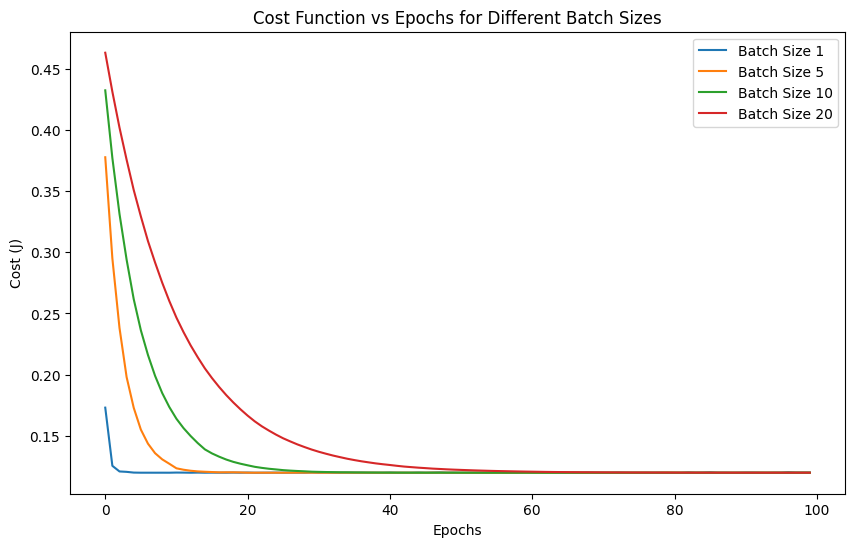

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Replace 'housing_prices.csv' with your actual file)
df = pd.read_csv('HousingPrices.txt')

# Assume the dataset has features in X and target price in y
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Last column is the target (price)

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)

# Add bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]

# Define cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, learning_rate, batch_size, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute gradients
            gradient = (1 / len(y_batch)) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradient  # Update parameters

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Training for different batch sizes
batch_sizes = [1, 5, 10, 20]
learning_rate = 0.01
epochs = 100
theta = np.zeros(X.shape[1])

plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    theta_init = np.zeros(X.shape[1])  # Reset theta
    _, cost_history = mini_batch_gradient_descent(X, y, theta_init, learning_rate, batch_size, epochs)
    plt.plot(range(len(cost_history)), cost_history, label=f'Batch Size {batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Cost Function vs Epochs for Different Batch Sizes')
plt.legend()
plt.show()